In [1]:
#%%
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.atr_adx_sma_m1_strategy import AtrAdxSmaM1Strategy
from vnpy.app.cta_strategy.strategies.boll_channel_cci_strategy import BollChannelCciStrategy
from datetime import datetime

2019-10-28 07:42:43.849396	开始加载历史数据
2019-10-28 07:42:46.733303	加载进度：##### [56%]
2019-10-28 07:42:49.518984	加载进度：########## [100%]
2019-10-28 07:42:49.519091	历史数据加载完成，数据量：75849
2019-10-28 07:42:49.560907	策略初始化完成
2019-10-28 07:42:49.560994	开始回放历史数据
2019-10-28 07:42:51.797454	历史数据回放结束
2019-10-28 07:42:51.797658	开始计算逐日盯市盈亏
2019-10-28 07:42:51.800938	逐日盯市盈亏计算完成
2019-10-28 07:42:51.801741	开始计算策略统计指标
2019-10-28 07:42:51.807930	------------------------------
2019-10-28 07:42:51.807978	首个交易日：	2019-09-02
2019-10-28 07:42:51.807996	最后交易日：	2019-10-25
2019-10-28 07:42:51.808010	总交易日：	54
2019-10-28 07:42:51.808021	盈利交易日：	28
2019-10-28 07:42:51.808031	亏损交易日：	26
2019-10-28 07:42:51.808107	起始资金：	200,000.00
2019-10-28 07:42:51.808125	结束资金：	264,020.35
2019-10-28 07:42:51.808143	总收益率：	32.01%
2019-10-28 07:42:51.808162	年化收益：	142.27%
2019-10-28 07:42:51.808182	最大回撤: 	-15,042.29
2019-10-28 07:42:51.808202	百分比最大回撤: -5.79%
2019-10-28 07:42:51.808221	总盈亏：	64,020.35
2019-10-28 07:42:51.808240	总手续费：	0.00
2019-10-

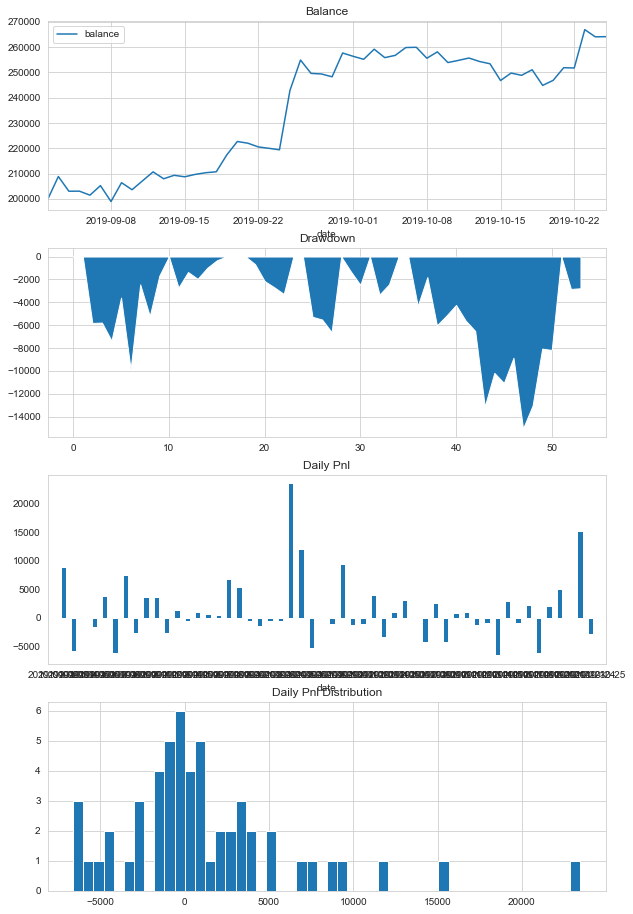

In [3]:
#%%
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="BTCUSDT.OKEX",
    interval="1m",
    start=datetime(2019, 9, 1),
    end=datetime(2019, 10, 25),
    rate=0.0,
    slippage=0.0,
    size=1,
    pricetick=0.01,
    capital=200_000,
)

engine.add_strategy(AtrAdxSmaM1Strategy, {})

# engine.strategy.adx_entry_point = 25
# engine.strategy.boll_dev = 5
# engine.strategy.boll_window = 5
# engine.strategy.cci_window = 10
# engine.strategy.sl_multiplier = 1.4


#%%
engine.load_data()
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics();
engine.show_chart()

In [ ]:
setting = OptimizationSetting()
setting.set_target("total_return")

setting.add_parameter("kk_length", 5, 20, 1)
setting.add_parameter("kk_dev", 0.1, 5, 0.1)
setting.add_parameter("trailing_percent", 0.1, 2, 0.1)

engine.run_ga_optimization(setting, population_size=20, ngen_size=500)